# 1. DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd

In [2]:
from glob import glob
import xml.etree.ElementTree as ET

path = glob('C:\\Users\\victu\\Downloads\\cardataset\\images\\*.xml')
labels_dict = dict(filepath=[], xmin=[], xmax=[], ymin=[], ymax=[])

for filename in path:
    info = ET.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [3]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head()

filepath  xmin  xmax  ymin  ymax
0  C:\Users\victu\Downloads\cardataset\images\N1.xml  1093  1396   645   727
1  C:\Users\victu\Downloads\cardataset\images\N10...   134   301   312   350
2  C:\Users\victu\Downloads\cardataset\images\N10...    31   139   128   161
3  C:\Users\victu\Downloads\cardataset\images\N10...   164   316   216   243
4  C:\Users\victu\Downloads\cardataset\images\N10...   813  1067   665   724

In [4]:
df.shape

(225, 5)

In [5]:
df.describe()

xmin         xmax         ymin         ymax
count   225.000000   225.000000   225.000000   225.000000
mean    294.151111   500.942222   303.213333   363.177778
std     272.849733   364.583056   243.297160   261.941062
min       1.000000    94.000000     2.000000    50.000000
25%     134.000000   290.000000   167.000000   213.000000
50%     192.000000   373.000000   230.000000   288.000000
75%     346.000000   568.000000   332.000000   397.000000
max    1804.000000  2493.000000  1734.000000  1882.000000

In [6]:
df.size

1125

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  225 non-null    object
 1   xmin      225 non-null    int64 
 2   xmax      225 non-null    int64 
 3   ymin      225 non-null    int64 
 4   ymax      225 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.9+ KB


In [8]:
df.tail()

filepath  xmin  xmax  ymin  ymax
220  C:\Users\victu\Downloads\cardataset\images\N95...    23   408   173   391
221  C:\Users\victu\Downloads\cardataset\images\N96...   137   352   141   186
222  C:\Users\victu\Downloads\cardataset\images\N97...   175   290   228   255
223  C:\Users\victu\Downloads\cardataset\images\N98...   563   675   207   238
224  C:\Users\victu\Downloads\cardataset\images\N99...   158   389   129   193

In [9]:
df.iloc[0:5,2:7]

xmax  ymin  ymax
0  1396   645   727
1   301   312   350
2   139   128   161
3   316   216   243
4  1067   665   724

In [10]:
import xml.etree.ElementTree as xet

In [11]:
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'../input/number-plate-detection/images/{name}'
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height
df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)
df.head()

filepath  xmin  xmax  ymin  ymax  \
0  C:\Users\victu\Downloads\cardataset\images\N1.xml  1093  1396   645   727   
1  C:\Users\victu\Downloads\cardataset\images\N10...   134   301   312   350   
2  C:\Users\victu\Downloads\cardataset\images\N10...    31   139   128   161   
3  C:\Users\victu\Downloads\cardataset\images\N10...   164   316   216   243   
4  C:\Users\victu\Downloads\cardataset\images\N10...   813  1067   665   724   

                                           filename  width  height  
0    ../input/number-plate-detection/images/N1.jpeg   1920    1080  
1  ../input/number-plate-detection/images/N100.jpeg    450     417  
2  ../input/number-plate-detection/images/N101.jpeg    249     239  
3  ../input/number-plate-detection/images/N102.jpeg    478     395  
4  ../input/number-plate-detection/images/N103.jpeg   1800    1200

In [12]:
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']
df.head()

filepath  xmin  xmax  ymin  ymax  \
0  C:\Users\victu\Downloads\cardataset\images\N1.xml  1093  1396   645   727   
1  C:\Users\victu\Downloads\cardataset\images\N10...   134   301   312   350   
2  C:\Users\victu\Downloads\cardataset\images\N10...    31   139   128   161   
3  C:\Users\victu\Downloads\cardataset\images\N10...   164   316   216   243   
4  C:\Users\victu\Downloads\cardataset\images\N10...   813  1067   665   724   

                                           filename  width  height  center_x  \
0    ../input/number-plate-detection/images/N1.jpeg   1920    1080  0.648177   
1  ../input/number-plate-detection/images/N100.jpeg    450     417  0.483333   
2  ../input/number-plate-detection/images/N101.jpeg    249     239  0.341365   
3  ../input/number-plate-detection/images/N102.jpeg    478     395  0.502092   
4  ../input/number-plate-detection/images/N103.jpeg   1800    1200  0.522222   

   center_y  bb_width  bb_height  
0  0.635185  0.157812   0.075926  
1  0.793765  0.371111   0.091127  
2  0.604603  0.433735   0.138075  
3  0.581013  0.317992   0.068354  
4  0.578750  0.141111   0.049167

# DATA CLEANING

In [13]:
df.duplicated().sum()

0

In [14]:
df['xmin'].nunique()

181

In [15]:
df['xmax'].unique()

array([1396,  301,  139,  316, 1067,  154,  434,  262,  356,  342,  239,
        187,  249,  347,  108,  200,  852,  559, 1284,  736,  506,  494,
        246,  328,  399,  142,  221,  504,  513,  349,  320, 1095,  365,
        341,  910,  593,  465,  607, 1351,  423,  348,  174,  524,  177,
        432,  613,  369,  324,  853,  372,  277,  725,  279,  245,  313,
        106,  224, 1173,  251,  336,  421,  374, 1034,  848,  474,  413,
        216,  442,  444,  370,  335,  665,  250,  383,  538,  297,  528,
        499,  343, 1391,  561,  839,  711,  381, 1558,  568,  769,  502,
        367,  220,  184,  112, 2493,  796,  290,  329, 1258,  206,  479,
        215,  339,  274,  319,  403,  337,  160,  353,  209,  258,  682,
        585,  300,  858,  183,  272, 1142,  768, 1031,  201,  484,  700,
        451,  223,  307,  656,  380,  243,  263,  280,  285,  542,  386,
        452,  364,  886,  429,  235, 1061, 1009,  260, 1219,  500, 1218,
        902,  229,  517,  645, 1830,  580,  373,  2

In [16]:
df.isna()

filepath   xmin   xmax   ymin   ymax  filename  width  height  center_x  \
0       False  False  False  False  False     False  False   False     False   
1       False  False  False  False  False     False  False   False     False   
2       False  False  False  False  False     False  False   False     False   
3       False  False  False  False  False     False  False   False     False   
4       False  False  False  False  False     False  False   False     False   
..        ...    ...    ...    ...    ...       ...    ...     ...       ...   
220     False  False  False  False  False     False  False   False     False   
221     False  False  False  False  False     False  False   False     False   
222     False  False  False  False  False     False  False   False     False   
223     False  False  False  False  False     False  False   False     False   
224     False  False  False  False  False     False  False   False     False   

     center_y  bb_width  bb_height  
0       False     False      False  
1       False     False      False  
2       False     False      False  
3       False     False      False  
4       False     False      False  
..        ...       ...        ...  
220     False     False      False  
221     False     False      False  
222     False     False      False  
223     False     False      False  
224     False     False      False  

[225 rows x 12 columns]

In [17]:
df.isna().sum()

filepath     0
xmin         0
xmax         0
ymin         0
ymax         0
filename     0
width        0
height       0
center_x     0
center_y     0
bb_width     0
bb_height    0
dtype: int64

In [18]:
df.sort_values('xmin')

filepath  xmin  xmax  ymin  \
122  C:\Users\victu\Downloads\cardataset\images\N21...     1   300    92   
25   C:\Users\victu\Downloads\cardataset\images\N12...    11   246    78   
72   C:\Users\victu\Downloads\cardataset\images\N17...    13   444   137   
16   C:\Users\victu\Downloads\cardataset\images\N11...    15   200    33   
190  C:\Users\victu\Downloads\cardataset\images\N64...    19    94   249   
..                                                 ...   ...   ...   ...   
0    C:\Users\victu\Downloads\cardataset\images\N1.xml  1093  1396   645   
196  C:\Users\victu\Downloads\cardataset\images\N7.xml  1149  1358   649   
185  C:\Users\victu\Downloads\cardataset\images\N59...  1238  2468  1012   
166  C:\Users\victu\Downloads\cardataset\images\N4.xml  1326  1830  1464   
100  C:\Users\victu\Downloads\cardataset\images\N2.xml  1804  2493  1734   

     ymax                                          filename  width  height  \
122   154  ../input/number-plate-detection/images/N219.jpeg    300     225   
25    165  ../input/number-plate-detection/images/N123.jpeg    250     250   
72    270  ../input/number-plate-detection/images/N171.jpeg    570     400   
16    126  ../input/number-plate-detection/images/N114.jpeg    250     166   
190   314   ../input/number-plate-detection/images/N64.jpeg    654     380   
..    ...                                               ...    ...     ...   
0     727    ../input/number-plate-detection/images/N1.jpeg   1920    1080   
196   702    ../input/number-plate-detection/images/N7.jpeg   1920    1080   
185  1269   ../input/number-plate-detection/images/N59.jpeg   3720    2472   
166  1607    ../input/number-plate-detection/images/N4.jpeg   3644    2429   
100  1882    ../input/number-plate-detection/images/N2.jpeg   3112    2340   

     center_x  center_y  bb_width  bb_height  
122  0.501667  0.546667  0.996667   0.275556  
25   0.514000  0.486000  0.940000   0.348000  
72   0.400877  0.508750  0.756140   0.332500  
16   0.430000  0.478916  0.740000   0.560241  
190  0.086391  0.740789  0.114679   0.171053  
..        ...       ...       ...        ...  
0    0.648177  0.635185  0.157812   0.075926  
196  0.652865  0.625463  0.108854   0.049074  
185  0.498118  0.461367  0.330645   0.103964  
166  0.433041  0.632153  0.138310   0.058872  
100  0.690392  0.772650  0.221401   0.063248  

[225 rows x 12 columns]

# 3. DATA VISUALIZATION

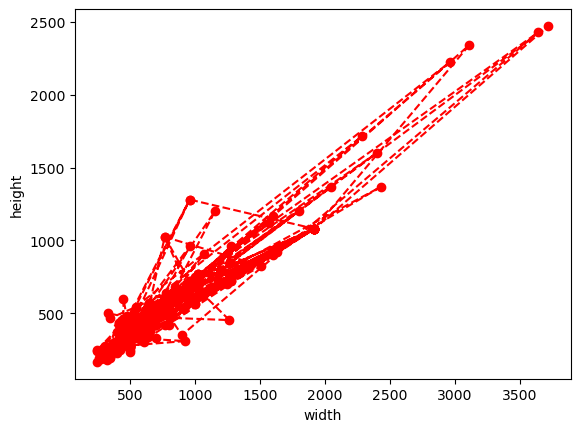

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df.width, df.height, marker='o', linestyle='--', color='red')
plt.xlabel('width')
plt.ylabel('height')
plt.show()


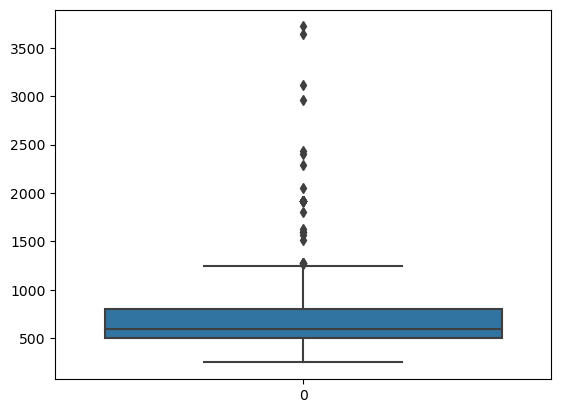

In [20]:
h=sns.boxplot(df.width)


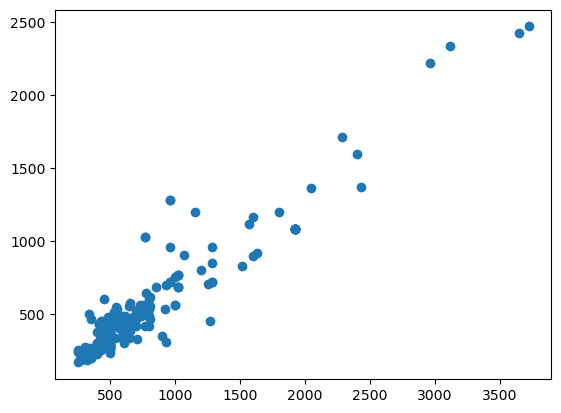

In [21]:
plt.scatter(df.width,df.height)

C:\Users\victu\AppData\Local\Temp\ipykernel_15092\434019810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.width)


<Axes: xlabel='width', ylabel='Density'>

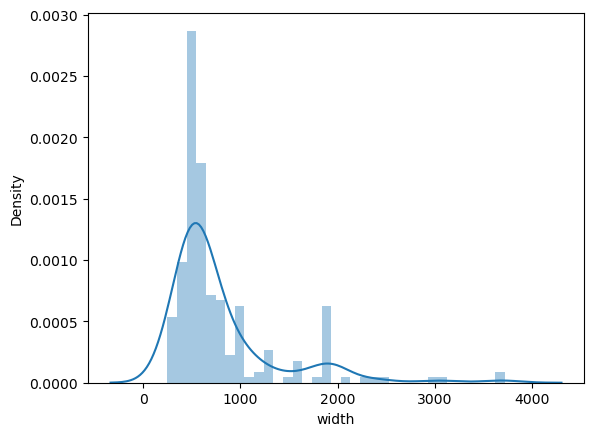

In [22]:
sns.distplot(df.width)


(array([107.,  67.,  23.,   5.,  15.,   2.,   2.,   1.,   1.,   2.]),
 array([ 249. ,  596.1,  943.2, 1290.3, 1637.4, 1984.5, 2331.6, 2678.7,
        3025.8, 3372.9, 3720. ]),
 <BarContainer object of 10 artists>)

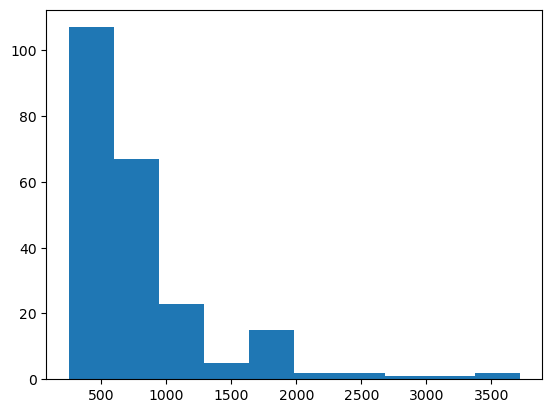

In [23]:
plt.hist(df.width)

C:\Users\victu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


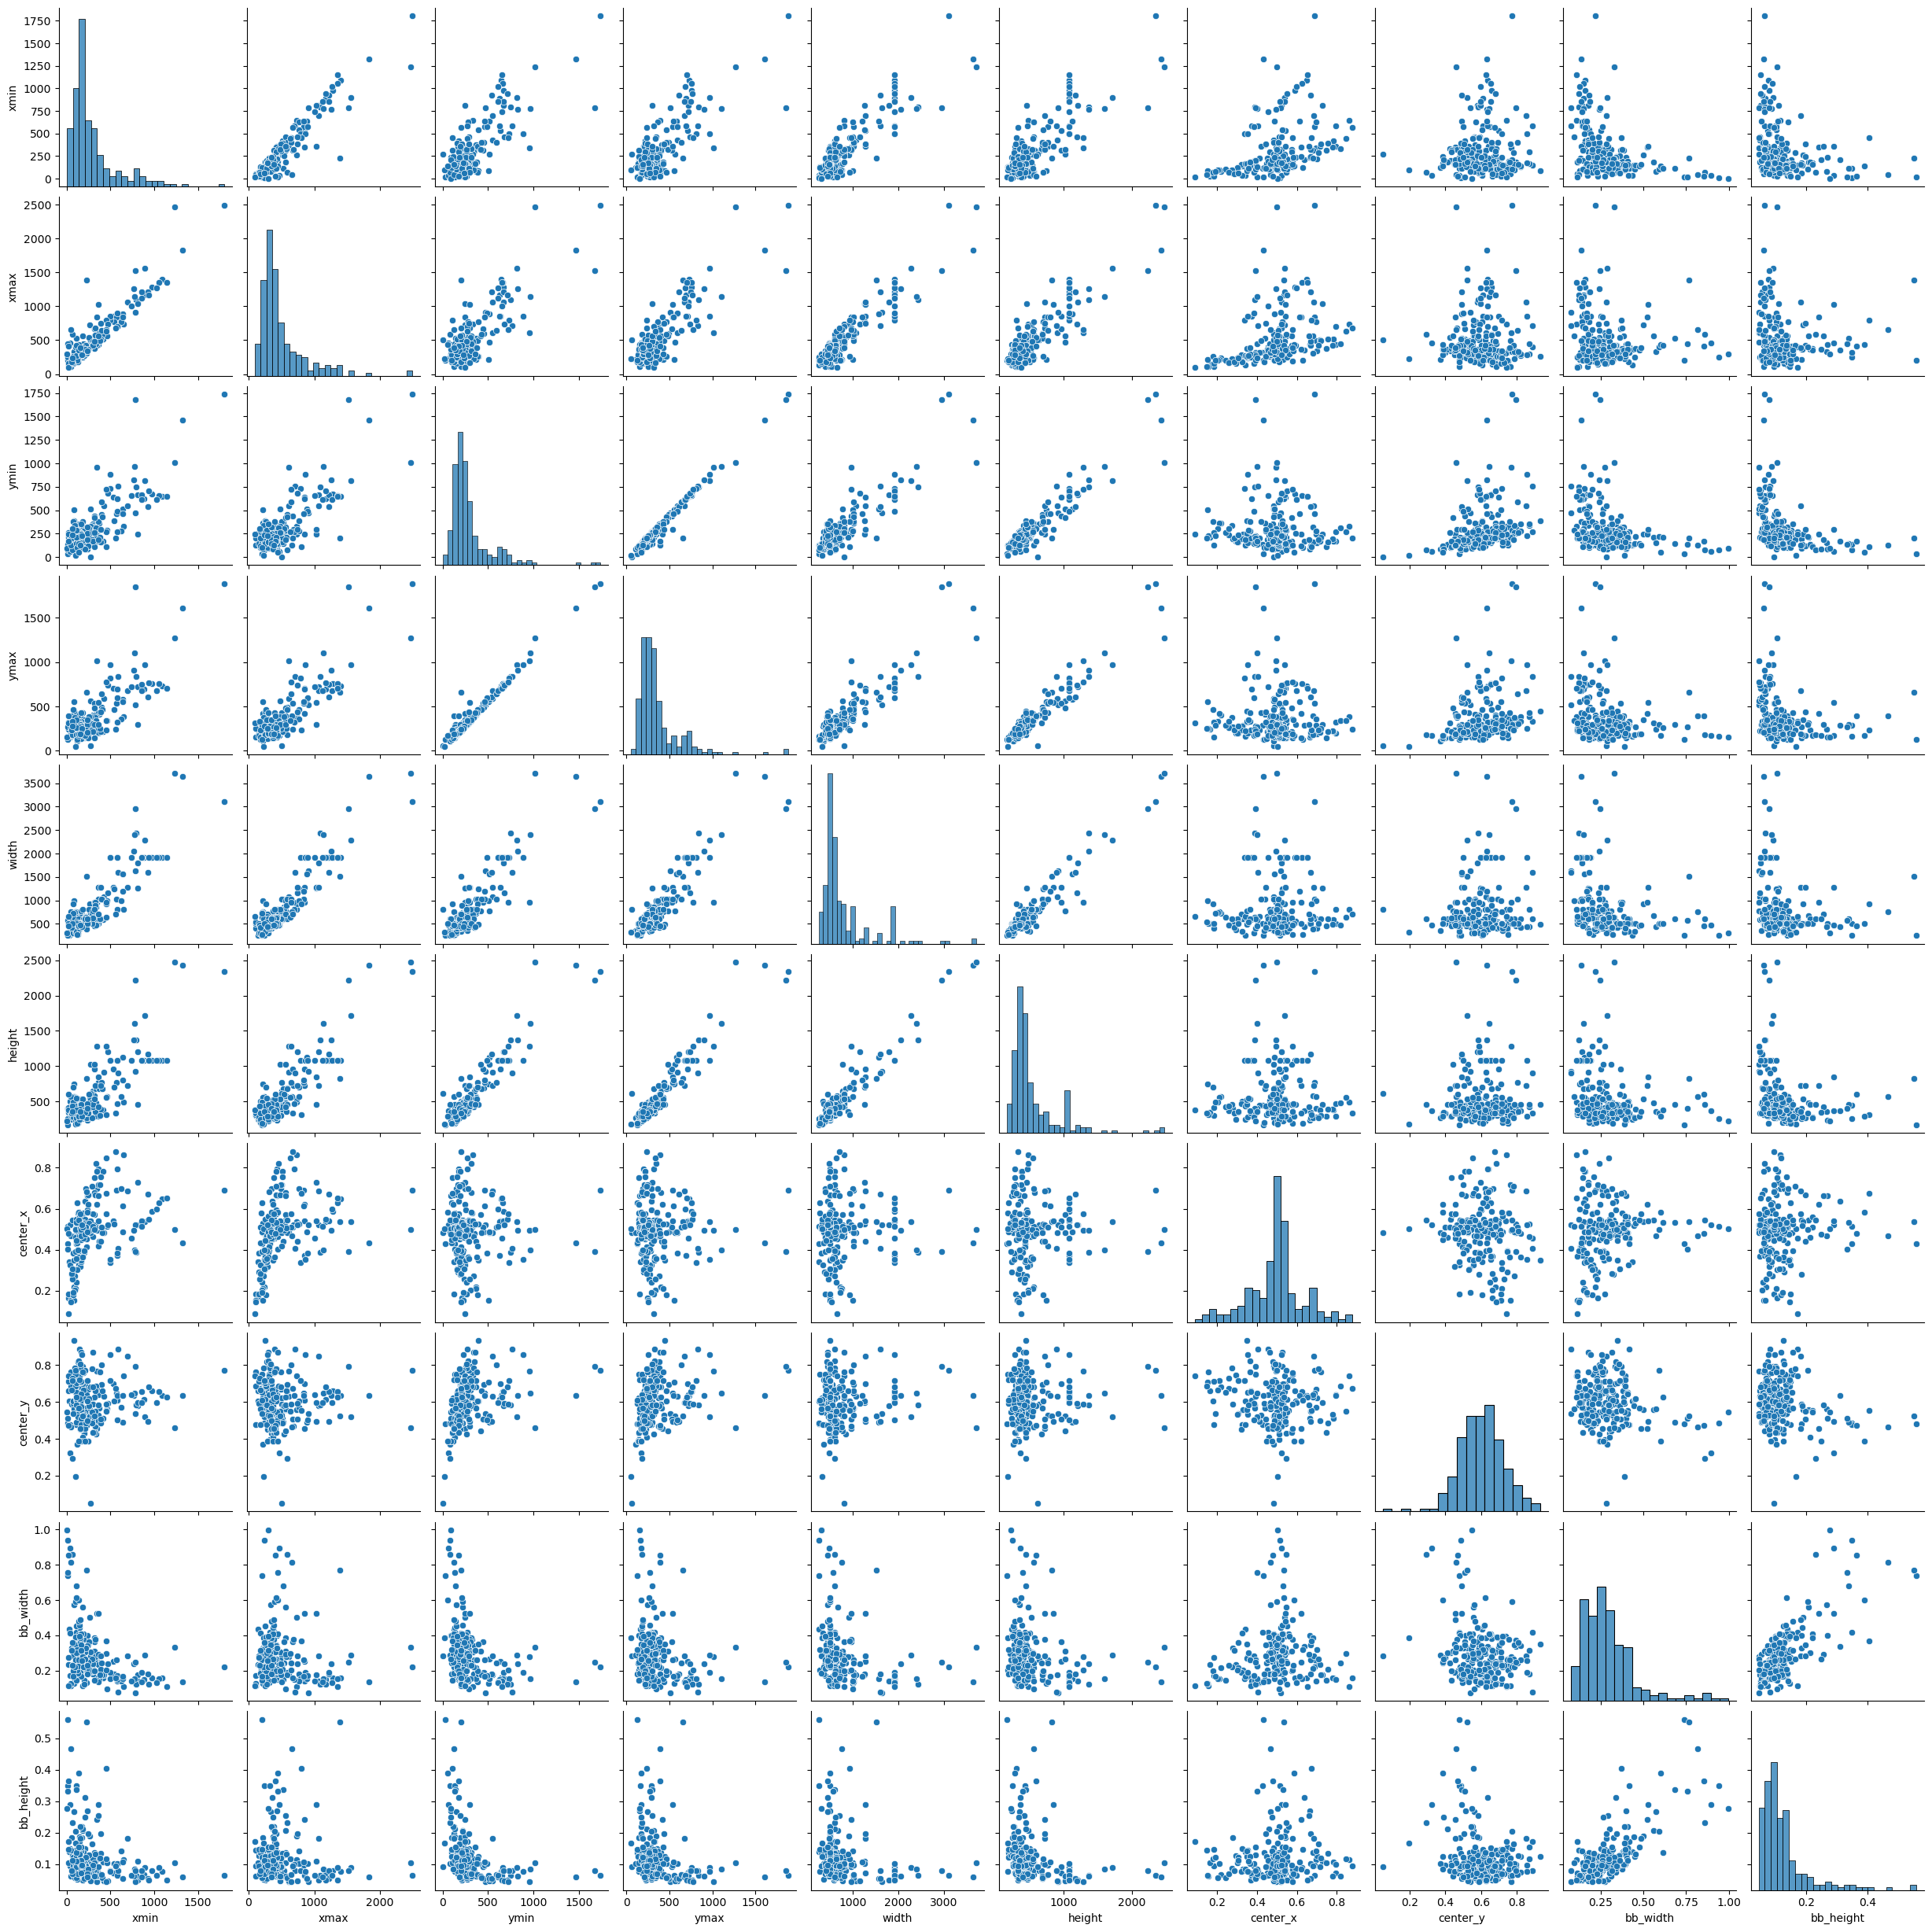

In [24]:
sns.pairplot(df)

In [25]:
import pygwalker as pyg
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-000610291800f7cbPRheTHaO4D13cykN" style="height: auto">\n    <head>…

<Axes: >

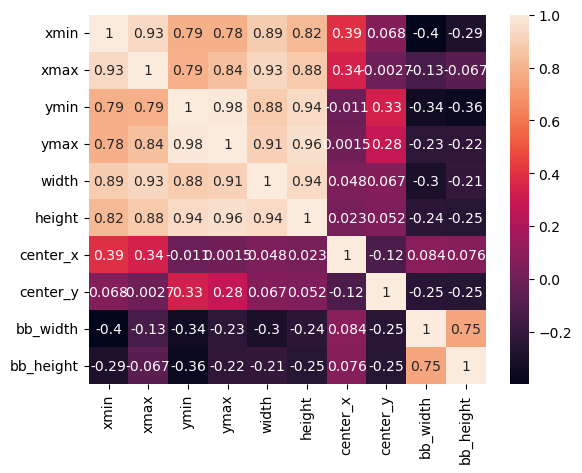

In [26]:
numeric_columns = df.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True)

In [27]:
numeric_columns.corr()

xmin      xmax      ymin      ymax     width    height  \
xmin       1.000000  0.930542  0.786743  0.783340  0.888751  0.815847   
xmax       0.930542  1.000000  0.789622  0.837693  0.927110  0.876065   
ymin       0.786743  0.789622  1.000000  0.984882  0.880751  0.936245   
ymax       0.783340  0.837693  0.984882  1.000000  0.905208  0.956380   
width      0.888751  0.927110  0.880751  0.905208  1.000000  0.938804   
height     0.815847  0.876065  0.936245  0.956380  0.938804  1.000000   
center_x   0.390451  0.337393 -0.010873  0.001504  0.047655  0.022931   
center_y   0.068455 -0.002707  0.330170  0.276696  0.066975  0.052136   
bb_width  -0.398730 -0.131452 -0.335007 -0.232469 -0.302504 -0.239253   
bb_height -0.291691 -0.067221 -0.362675 -0.223473 -0.210348 -0.253745   

           center_x  center_y  bb_width  bb_height  
xmin       0.390451  0.068455 -0.398730  -0.291691  
xmax       0.337393 -0.002707 -0.131452  -0.067221  
ymin      -0.010873  0.330170 -0.335007  -0.362675  
ymax       0.001504  0.276696 -0.232469  -0.223473  
width      0.047655  0.066975 -0.302504  -0.210348  
height     0.022931  0.052136 -0.239253  -0.253745  
center_x   1.000000 -0.115247  0.084400   0.075893  
center_y  -0.115247  1.000000 -0.249583  -0.252633  
bb_width   0.084400 -0.249583  1.000000   0.749013  
bb_height  0.075893 -0.252633  0.749013   1.000000

# 4. SPLITTING THE DATA INTO TRAINING AND TESTING

In [29]:
df_train = df.iloc[:200]
df_test = df.iloc[200:]

# 5. TRAIN THE YOLO MODEL

In [1]:
import os
import cv2
import tensorflow as tf
import pytesseract as pt
import plotly.express as px
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
!pip install -r ./yolov5/requirements.txt

In [6]:
### split the data into train and test
df_train = df.iloc[:200]
df_test = df.iloc[200:]

In [12]:
!python ./yolov5/train.py --data ./data.yaml --cfg ./yolov5/models/yolov5s.yaml --batch-size 8 --name Model --epochs 100

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5

wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.

train: weights=yolov5\yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=

In [13]:
!python ./yolov5/export.py --weight ./yolov5/runs/train/Model/weights/best.pt --include torchscript onnx

requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...

  Obtaining dependency information for onnx>=1.12.0 from https://files.pythonhosted.org/packages/db/2d/0851d7bb5ae1d08cc27a0ccfba9e77e2393f47ea56e57d347e2926b6d316/onnx-1.15.0-cp311-cp311-win_amd64.whl.metadata





   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.3 MB 656.4 kB/s eta 0:00:22
   ---------------------------------------- 0.1/14.3 MB 751.6 kB/s eta 0:00:19
   ---------------------------------------- 0.2/14.3 MB 919.0 kB/s eta 0:00:16
    --------------------------------------- 0.2/14.3 MB 1.0 MB/s eta 0:00:14
    --------------------------------------- 0.3/14.3 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.4/14.3 MB 1.2 MB/s eta 0:00:12
   - ---------

export: data=C:\Users\victu\yolov5\data\coco128.yaml, weights=['./yolov5/runs/train/Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from yolov5\runs\train\Model\weights\best.pt with output shape (1, 25200, 6) (54.2 MB)

TorchScript: starting export with torch 2.1.1+cpu...
TorchScript: export success  3.4s, saved as yolov5\runs\train\Model\weights\best.torchscript (27.2 MB)

ONNX: starting export with onnx 1.15.0...
ONNX: export success  37.3s, saved as yolov5\runs\train\Model\weights\best.onnx (27.2 MB)

Export complete (41.7s)
Results saved

In [7]:
INPUT_WIDTH =  640
INPUT_HEIGHT = 640

In [8]:
net = cv2.dnn.readNetFromONNX('./yolov5/runs/train/Model/weights/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [9]:
def get_detections(img,net):
    # 1.CONVERT IMAGE TO YOLO FORMAT
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # 2. GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    detections = preds[0]
    
    return input_image, detections

def non_maximum_supression(input_image,detections):
    
    # 3. FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        if confidence > 0.4:
            class_score = row[5] # probability score of license plate
            if class_score > 0.25:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                boxes.append(box)

    # 4.1 CLEAN
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    
    # 4.2 NMS
    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45)
    
    return boxes_np, confidences_np, index

def drawings(image,boxes_np,confidences_np,index):
    # 5. Drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)
        license_text = extract_text(image,boxes_np[ind])


        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.rectangle(image,(x,y-30),(x+w,y),(255,0,255),-1)
        cv2.rectangle(image,(x,y+h),(x+w,y+h+25),(0,0,0),-1)


        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
        cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1)

    return image

In [10]:
# predictions flow with return result
def yolo_predictions(img,net):
    # step-1: detections
    input_image, detections = get_detections(img,net)
    # step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    # step-3: Drawings
    result_img = drawings(img,boxes_np,confidences_np,index)
    return result_img

In [11]:
# extrating text
def extract_text(image,bbox):
    x,y,w,h = bbox
    roi = image[y:y+h, x:x+w]
    
    if 0 in roi.shape:
        return 'no number'
    
    else:
        text = pt.image_to_string(roi, config='--psm 8 --oem 3 -l eng')
        text = text.strip()
        
        return text

In [12]:
# test
#img = io.imread('./TEST.jpeg')
#results = yolo_predictions(img,net)

In [13]:
print(results)

[[[251 203 229]
  [255 210 236]
  [249 201 227]
  ...
  [116 105  99]
  [155 143 131]
  [  0  26   1]]

 [[234 179 208]
  [238 183 212]
  [230 176 202]
  ...
  [145 132 124]
  [182 170 158]
  [  4  30   1]]

 [[213 157 184]
  [212 156 183]
  [204 148 175]
  ...
  [167 153 142]
  [200 186 173]
  [ 49  79  41]]

 ...

 [[108 107 113]
  [113 112 118]
  [114 113 119]
  ...
  [ 88  89  91]
  [ 91  91  93]
  [ 27  62  22]]

 [[120 119 125]
  [125 124 130]
  [126 125 131]
  ...
  [ 89  90  94]
  [ 91  91  93]
  [ 37  71  34]]

 [[124 123 129]
  [125 124 130]
  [125 124 130]
  ...
  [ 95  95  97]
  [ 94  94  96]
  [ 34  69  27]]]


In [14]:
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


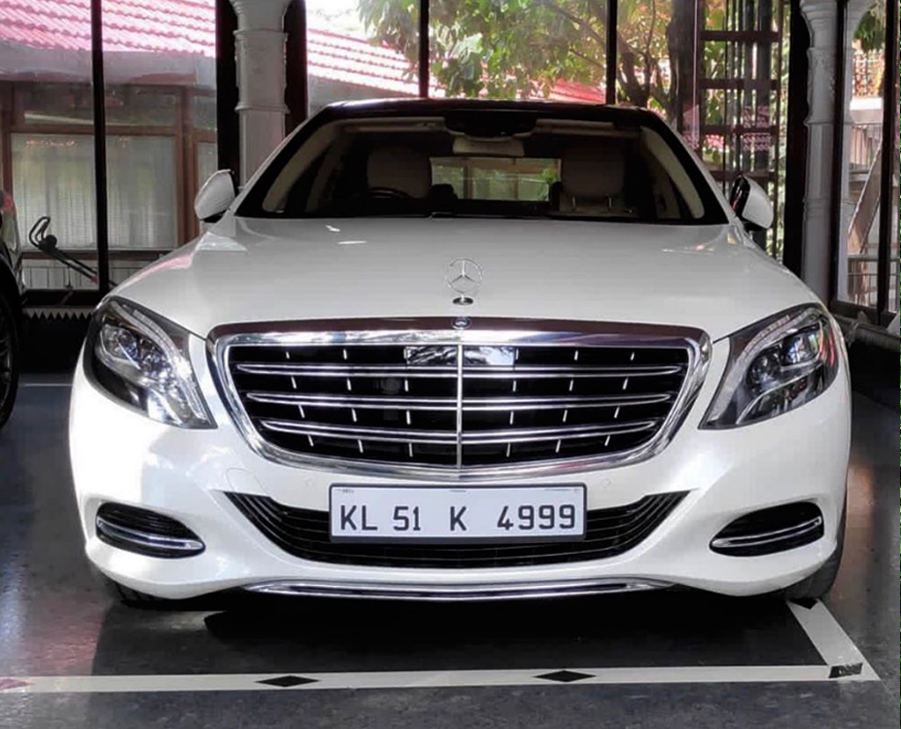

In [15]:
fig = px.imshow(img)
fig.update_layout(width=700, height=400, margin=dict(l=10, r=10, b=10, t=10))
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()

In [ ]:
import cv2
import easyocr
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

class LicensePlateRecognitionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("License Plate Recognition App")
        self.root.state("zoomed")

        self.image_path = ""
        self.result_label = tk.Label(root, text="Detected License Plate:", font=("Times New Roman",40))
        self.result_label.pack(pady=5)

        self.canvas = tk.Canvas(root)
        self.canvas.pack()

        self.browse_button = tk.Button(root, text="Browse Image", command=self.browse_image, width=25,height=4, font=("Times New Roman", 18))
        self.browse_button.pack()

        self.webcam_button = tk.Button(root, text="Use Webcam", command=self.use_webcam, width=25,height=4, font=("Times New Roman", 18))
        self.webcam_button.pack()

        self.stop_webcam_button = tk.Button(root, text="Stop Webcam", command=self.stop_webcam, state=tk.DISABLED, width=25,height=4, font=("Times New Roman", 18))
        self.stop_webcam_button.pack()

        self.detect_button = tk.Button(root, text="Detect License Plate", command=self.detect_license_plate, width=25,height=4, font=("Times New Roman", 18))
        self.detect_button.pack()

        self.video_capture = None

    def browse_image(self):
        self.image_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])

        if self.image_path:
            self.display_image()

    def display_image(self):
        img = Image.open(self.image_path)
        img = img.resize((400, 400), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)

        self.canvas.config(width=img.width(), height=img.height())
        self.canvas.create_image(0, 0, anchor=tk.NW, image=img)
        self.canvas.image = img

    def use_webcam(self):
        self.video_capture = cv2.VideoCapture(0)  # Open the default camera (change 0 to another number if multiple cameras)
        self.detect_license_plate_from_webcam()
        self.webcam_button.config(state=tk.DISABLED)
        self.stop_webcam_button.config(state=tk.NORMAL)

    def detect_license_plate_from_webcam(self):
        if self.video_capture is not None and self.video_capture.isOpened():
            ret, frame = self.video_capture.read()

            if ret:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
                plates = cascade.detectMultiScale(gray, 1.1, 4)

                for (x, y, w, h) in plates:
                    plate = frame[y:y + h, x:x + w]
                    plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
                    (_, plate) = cv2.threshold(plate_gray, 128, 255, cv2.THRESH_OTSU)

                    reader = easyocr.Reader(['en'])
                    read = reader.readtext(plate)
                    recognized_text = "".join([result[1] for result in read])

                    cv2.rectangle(frame, (x, y), (x + w, y + h), (55, 55, 255), 2)
                    cv2.putText(frame, recognized_text, (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 255, 0), 2,
                                cv2.LINE_AA)

                # Display the frame with the detected license plate
                cv2.imshow('Webcam - License Plate Detection', frame)

            # Call this function recursively to process the next frame
            self.root.after(10, self.detect_license_plate_from_webcam)

    def stop_webcam(self):
        if self.video_capture is not None and self.video_capture.isOpened():
            self.video_capture.release()
            cv2.destroyAllWindows()
            self.webcam_button.config(state=tk.NORMAL)
            self.stop_webcam_button.config(state=tk.DISABLED)

    def detect_license_plate(self):
        if not self.image_path:
            return

        img = cv2.imread(self.image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
        plates = cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in plates:
            plate = img[y:y + h, x:x + w]
            plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
            (_, plate) = cv2.threshold(plate_gray, 128, 255, cv2.THRESH_OTSU)

            reader = easyocr.Reader(['en'])
            read = reader.readtext(plate)
            recognized_text = "".join([result[1] for result in read])

            cv2.rectangle(img, (x, y), (x + w, y + h), (55, 55, 255), 2)
            cv2.putText(img, recognized_text, (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 255, 0), 2,
                        cv2.LINE_AA)

        cv2.imshow('Result', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        self.result_label.config(text=f"Detected License Plate: {recognized_text}")

    def __del__(self):
        if self.video_capture is not None and self.video_capture.isOpened():
            self.video_capture.release()

if __name__ == "__main__":
    root = tk.Tk()
    app = LicensePlateRecognitionApp(root)
    root.mainloop()
